In [2]:
from PIL import Image
import numpy as np
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [10]:
image = Image.open('catflower.jpg')
image.show()

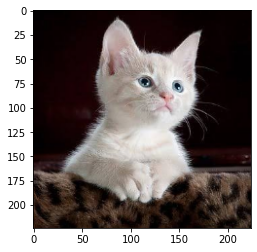

In [9]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('images.jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image = imageio.imread('cat.jpeg')
f = open('cat.txt' , 'r')

values = f.readline()
splitted = values.split()
xMin = int(splitted[0])
yMin = int(splitted[1])
xMax = int(splitted[2])
yMax = int(splitted[3])
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=xMin, x2=xMax, y1=yMin, y2=yMax)
], shape=image.shape)
ia.imshow('cat.jpeg')

<h2> true image size vs imageView </h2>

In [38]:
image = imageio.imread('images.jpeg')
print('images')
print(image.shape)
print("imageView: 1129, 1080")
image = imageio.imread('cat.jpeg')
print('cat')
print(image.shape)
print("imageView: 1212, 1080")
image = imageio.imread('catflower.jpg')
print('catflower')
print(image.shape)
print("imageView: 1080, 1080")

images
(340, 325, 3)
imageView: 1129, 1080
cat
(587, 523, 3)
imageView: 1212, 1080
catflower
(3609, 3609, 3)
imageView: 1080, 1080


(340, 325, 3)


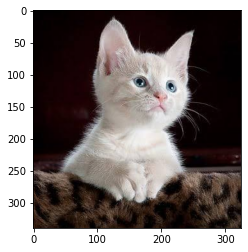

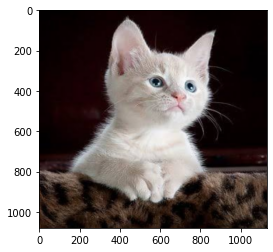

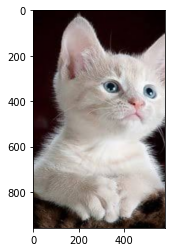

In [8]:

image = cv2.imread('images.jpeg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1129, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 817-236
h = 978-19

cropped_image = image_resized[19:19+h, 236:236+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)



(587, 523, 3)


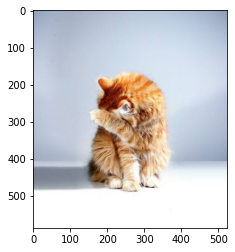

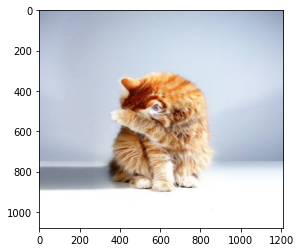

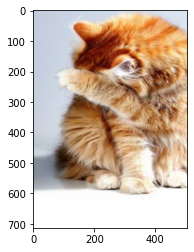

In [9]:
image = cv2.imread('cat.jpeg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1212, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 780-274
h = 1011-298

cropped_image = image_resized[298:298+h, 274:274+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)

(3609, 3609, 3)


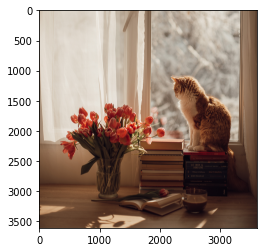

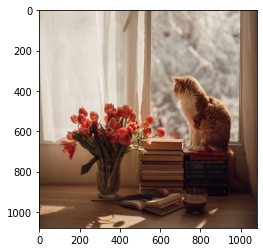

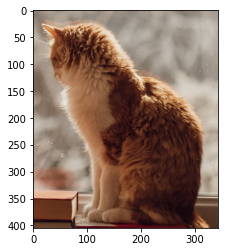

In [8]:
image = cv2.imread('catflower.jpg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image_resized = cv2.resize(image, (1080, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()

w = 980-636
h = 709-304

cropped_image = image_resized[304:304+h, 636:636+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("original", image)

<h2> Resize Image and Check App </h2>

Original Image
(1769, 1769, 3)


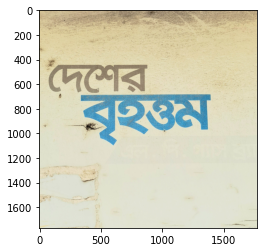

Found 2 Annotations
Resized Image


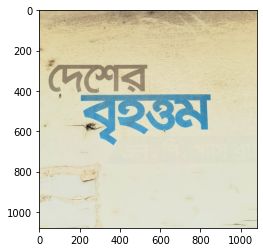

Desher, 52, 244, 540, 408



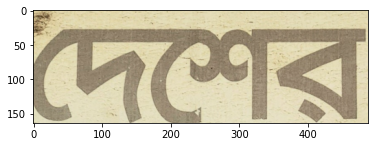

Brihottomo, 201, 417, 859, 670



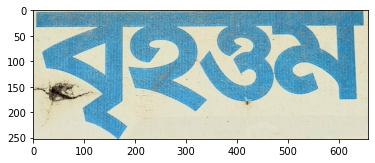

<function TextIOWrapper.close()>

In [28]:
print('Original Image')
image = cv2.imread('bn1.jpg')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()




f = open('bn1.txt', "r")
line_count = 0
for line in f:
    if line != "\n":
        line_count += 1

f.close()

print("Found " + str(line_count) + " Annotations")

print('Resized Image')
image_resized = cv2.resize(image, (1080, 1080), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.show()


f = open('bn1.txt', "r")
while line_count > 0:
    values = f.readline()
    splitted =values.split(', ')
    x1 = int(splitted[1])
    y1 = int(splitted[2])
    x2 = int(splitted[3])
    y2 = int(splitted[4])

    w = x2 - x1
    h = y2 - y1

    print(values)
    cropped_image = image_resized[y1:y1+h, x1:x1+w]
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()


    line_count -= 1

f.close
